### 판다스 내장 그래프 도구
* 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포드하지 않고 간단히 그래프 그릴 수 있음.
* 선그래프 : df.plot()메소드 적용시 다른 옵션을 추가하지 않으면 가장 기본적인 선 그래프를 그림.
* 막대 그래프 : df.plot(kind='bar'), df.plot(kind='barh',stacked=True,alpha=0.8)
* 수평 막대 그래프 : df.plot(kind='barh',color='skyblue'), df.plot.barh( )
* 히스토그램 : df.plot(kind='hist')
* 산점도 : df.plot(x=' ', y=' ', kind='scatter'), 상관관계를 볼 수 있음.
* 박스 플롯 : df.plot(kind='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공.

## matplotlib
- histogram : plt.hist(x, bins= )
- line plot : plt.plot(x,y)
- plt.bar(x,y, width= , color='')
- scatter plot : plt.scatter(x, y): 

## seaborn
- sns.distplot(data, bins=, color=, kde=), histplot, displot으로 변경
- sns.boxplot(x, y, data, color)
- sns.violinplot(x, y, data, color)
- sns.barplot(x, y, data, color)
- sns.jointplot(x, y, data, color)
- sns.pairplot(data, hue, palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)

In [2]:
import pandas as pd
df = pd.read_csv('../dataset/주가데이터.csv')
df.head()

,연월일,당일종가,전일종가,시가,고가,저가,거래량
0,2018-07-02,10100,600,10850,10900,10000,137977
1,2018-06-29,10700,300,10550,10900,9990,170253
2,2018-06-28,10400,500,10900,10950,10150,155769
3,2018-06-27,10900,100,10800,11050,10500,133548
4,2018-06-26,10800,350,10900,11000,10700,63039


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연월일     20 non-null     object
 1   당일종가    20 non-null     int64 
 2   전일종가    20 non-null     int64 
 3   시가      20 non-null     int64 
 4   고가      20 non-null     int64 
 5   저가      20 non-null     int64 
 6   거래량     20 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.2+ KB


In [4]:
df.drop('전일종가',axis=1,inplace=True)
df.columns=['Date', 'Close', 'Start', 'High', 'Low', 'Volume']
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [5]:
df.to_pickle('../dataset/sprice.pkl')
df = pd.read_pickle('../dataset/sprice.pkl')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [3]:
df = pd.read_pickle('../dataset/sprice.pkl')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [4]:
# Q. NDate 칼럼을 datetime 타입으로 생성하고 인덱스로 셋팅하세요.
# 컬럼 선택 : 'Close' 'Start' 'High' 'Low'
import pandas as pd
df['Ndate']=pd.to_datetime(df['Date'])
df.set_index('Ndate', inplace=True)
df1 = df[['Close','Start','High','Low']]
df1.head()

,Close,Start,High,Low
Ndate,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


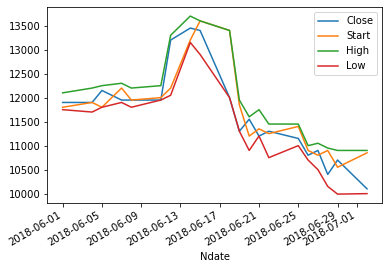

In [9]:
# 선그래프
df1.plot()

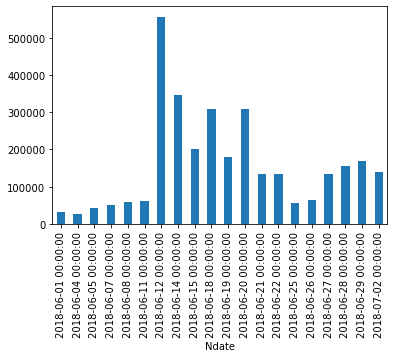

In [13]:
# 막대 그래프 : 일별 거래량
df.Volume[::-1].plot(kind='bar')

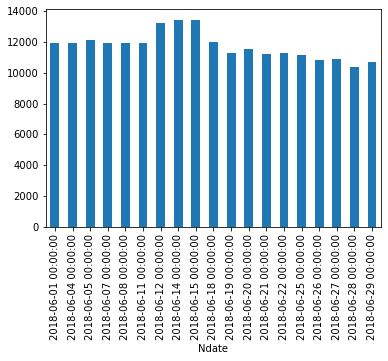

In [15]:
# 6월말 추출하여 Close 칼럼으로 일별 막대 그래프 표현
df1.loc['2018-6','Close'][::-1].plot(kind='bar')

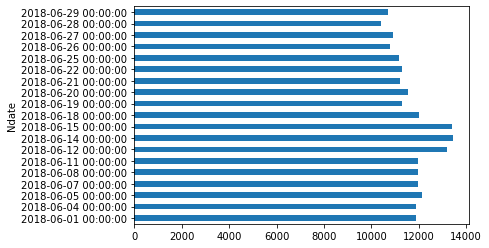

In [65]:
# df1.loc['2018-6','Close'][::-1].plot(kind='barh',color='skyblue')
df1.loc['2018-6','Close'][::-1].plot.barh()

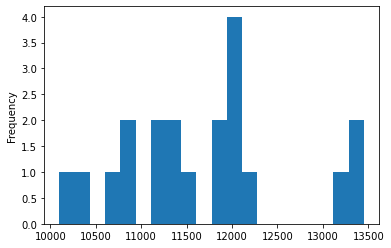

In [18]:
# 히스토그램 : 변수의 도수분포
df1.Close.plot(kind='hist',bins=20)

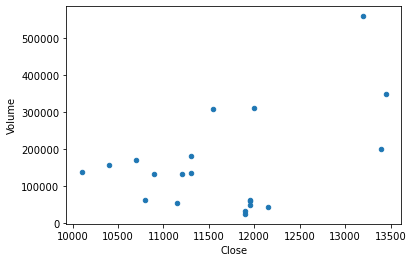

In [19]:
df.plot(x='Close',y='Volume',kind='scatter')

In [20]:
# 상관계수
df.corr()

,Close,Start,High,Low,Volume
Close,1.000000,0.856181,0.941201,0.946297,0.441466
Start,0.856181,1.000000,0.961009,0.921467,0.337829
High,0.941201,0.961009,1.000000,0.945487,0.484145
Low,0.946297,0.921467,0.945487,1.000000,0.246323
Volume,0.441466,0.337829,0.484145,0.246323,1.000000


In [22]:
df.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

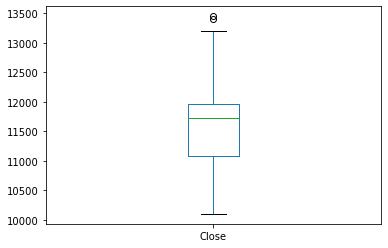

In [21]:
# box plot
df.Close.plot(kind='box')

#### Box plot 의미 해석

* IQR(Inter Quartile Range): 제 3사분위수 - 제1사분위수
* lower whisker: Q1 - 1.5 x IQR 이내인 값중에서 최솟값
* upper whisker: Q3 + 1.5 x IQR 이내인 값중에서 최댓값
* 이상치: lower whisker, upper whisker를 벗어나는 값 

In [27]:
# 이상치
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
abv = df[(df['Close'] <= (Q1-IQR*1.5)) | (df['Close'] >= (Q3+IQR*1.5))]
abv

,Date,Close,Start,High,Low,Volume
Ndate,,,,,,
2018-06-15,2018-06-15,13400,13600,13600,12900,201376
2018-06-14,2018-06-14,13450,13200,13700,13150,347451


In [28]:
# upper whisker 산출 기준 : Q3 + 1.5 x IQR 이내인 값중에서 최댓값
Q3+IQR*1.5

13275.0

In [42]:
# upper whisker = 13200
# 이상치 : u whisker를 벗어나는 값
df.sort_values('Close',ascending=False)[['Close']].head()

,Close
Ndate,
2018-06-14,13450
2018-06-15,13400
2018-06-12,13200
2018-06-05,12150
2018-06-18,12000


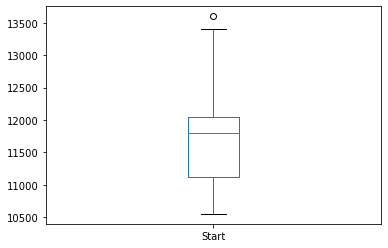

In [6]:
# Q. Start 칼럼의 분포 및 이상치 여부를 탐색하는 Box Plot 및 이상치를 구하세요.
df.Start.plot(kind='box')

In [7]:
df.sort_values('Start',ascending=False)[['Close']].head()

,Close
Ndate,
2018-06-15,13400
2018-06-18,12000
2018-06-14,13450
2018-06-07,11950
2018-06-12,13200


In [9]:
# 이상치
Q1 = df.Start.describe()['25%']
Q3 = df.Start.describe()['75%']
IQR = Q3 - Q1
abv = df[(df['Start'] <= (Q1-IQR*1.5)) | (df['Start'] >= (Q3+IQR*1.5))]
abv

,Date,Close,Start,High,Low,Volume
Ndate,,,,,,
2018-06-15,2018-06-15,13400,13600,13600,12900,201376


In [10]:
# upper whisker 산출 기준 : Q3 + 1.5 x IQR 이내인 값중에서 최댓값
Q3+IQR*1.5

13437.5

#### 과제. High, Low 컬럼에 대하여 이상치 여부를 시각화로 확인 후 그 값을 제거하세요.

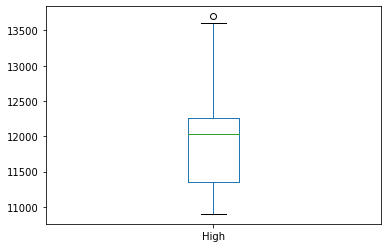

In [15]:
df.High.plot(kind='box')

In [17]:
df.sort_values('High',ascending=False)[['High']].head()

,High
Ndate,
2018-06-14,13700
2018-06-15,13600
2018-06-18,13400
2018-06-12,13300
2018-06-07,12300


In [33]:
# upper whisker 산출 기준 : Q3 + 1.5 x IQR 이내인 값중에서 최댓값

Q1 = df.High.describe()['25%']
Q3 = df.High.describe()['75%']
IQR = Q3 - Q1
# abv = df[(df['High'] <= (Q1-IQR*1.5)) | (df['High'] >= (Q3+IQR*1.5))]
# print(abv)
uwc = Q3+IQR*1.5
uw = df.High[df.High <= uwc].max()
print('upper whisker : ', uw)
print('이상치 : ', df.High[df.High>uw].values[0])


upper whisker :  13600
이상치 :  13700


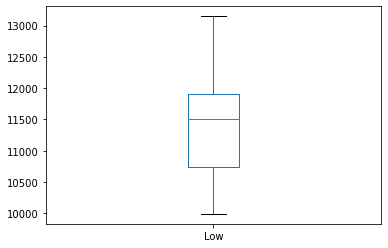

In [16]:
df.Low.plot(kind='box')

In [11]:
# 남북한의 연도별 발전량 데이터 셋
# Q. 남북한 발전량 데이터를 시각적으로 탐색하고 그 특징을 요약 기술하세요.
df_ep = pd.read_excel('../dataset/df_ep.xlsx')
df_ep.head()

,year,south,notth
0,1990,1077,277
1,1991,1186,263
2,1992,1310,247
3,1993,1444,221
4,1994,1650,231


In [ ]:
# 엑셀 파일 불러오기 에러나는 경우 시도해 볼 수 있는 방법
!pip install openpyxl
!pip install xlrd
pd.read_excel('../dataset/df_ep.xlsx',encoding = 'cp949')

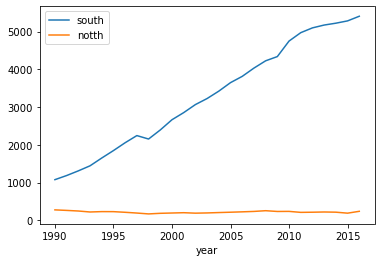

In [12]:
df_ep.set_index('year',inplace=True)
df_ep.plot()

#### 과제. df_auto의 각 칼럼을 시각화해서 탐색한 후 인사이트를 기술하세요.(5개 이상)

In [13]:
df_auto = pd.read_excel('../dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [14]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


#### 과제. mpg 컬럼의 이상치 여부를 판단하시고 의심되는 값이 있는 경우 제거하세요.

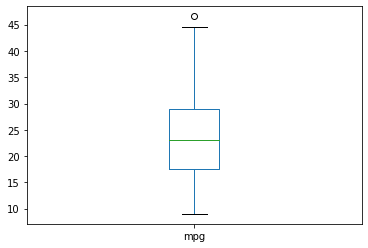

In [34]:
df_auto.mpg.plot(kind='box')

In [35]:
# upper whisker 산출 기준 : Q3 + 1.5 x IQR 이내인 값중에서 최댓값

Q1 = df_auto.mpg.describe()['25%']
Q3 = df_auto.mpg.describe()['75%']
IQR = Q3 - Q1

uwc = Q3+IQR*1.5
uw = df_auto.mpg[df_auto.mpg <= uwc].max()
print('upper whisker : ', uw)
print('이상치 : ', df_auto.mpg[df_auto.mpg>uw].values[0])

upper whisker :  44.6
이상치 :  46.6


In [60]:
# 이상치 삭제
Q1 = df_auto.mpg.describe()['25%']
Q3 = df_auto.mpg.describe()['75%']
IQR = Q3 - Q1

uwc = Q3+IQR*1.5
idx_uw = df_auto[df_auto.mpg <= uwc].mpg.idxmax()

idx = df_auto[df_auto.mpg > df_auto.loc[idx_uw,'mpg']].index[0]
idx
df = df_auto.drop(df_auto.index[idx])

df.sort_values('mpg',ascending=False)[['mpg']].head()

,mpg
329,44.6
325,44.3
394,44.0
326,43.4
244,43.1


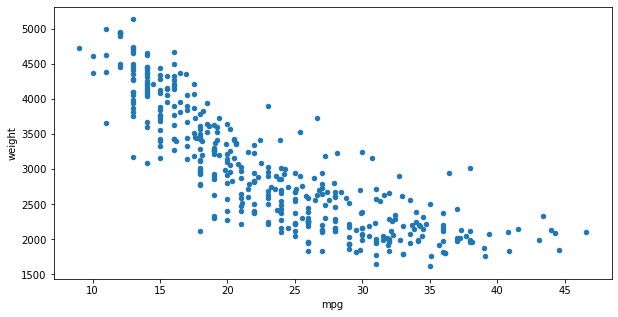

In [66]:
df_auto[['mpg','weight']].plot(x='mpg',y='weight',kind='scatter',figsize=(10,5))

#### Matplotlib
- 파이썬에서 사용되는 대표적인 데이터 시각화 라이브러리. 
- 2D, 3D 그래프, 히스토그램, 산점도, 파이차트 등 다양한 그래프를 지원하며, 
- 사용자가 그래프의 세부적인 설정을 조절할 수 있도록 다양한 옵션을 제공
- 핵심적인 개념은 Figure(그림)와 Axes(축)
- Figure는 그래프 전체를 의미하며, 하나의 Figure에 여러 개의 Axes를 추가하여 서로 다른 그래프를 그림 
- Axes는 Figure 내부의 그래프 영역을 의미하며, x축과 y축을 포함한 그래프 요소들을 생성하는 역할

Text(0, 0.5, 'Y-axis')

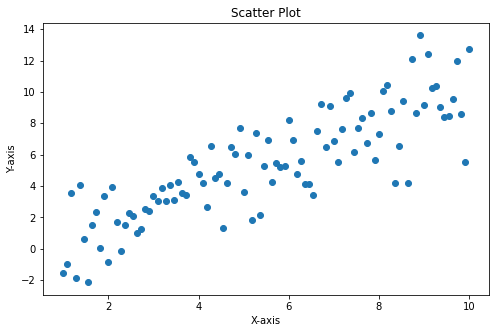

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 생성
# x = np.arange(20)
# y = np.arange(20)*2 + np.random.randn(20)*5
y = []
x = np.linspace(1,10,100)
for i in x:
    r = i + np.random.normal(0,2)
    y.append(r) 

plt.figure(figsize=(8,5))
# 산점도 그래프 그리기
plt.scatter(x, y)

# 그래프 제목, x축 레이블, y축 레이블 설정
plt.title("Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# 그래프 출력
# plt.show()

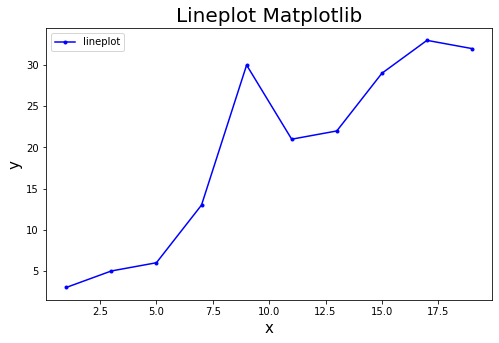

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])
plt.figure(figsize=(8,5))
plt.plot(x,y,color='blue',marker='o',markersize=3)
plt.title('Lineplot Matplotlib',size = 20)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
plt.legend(labels=['lineplot'])

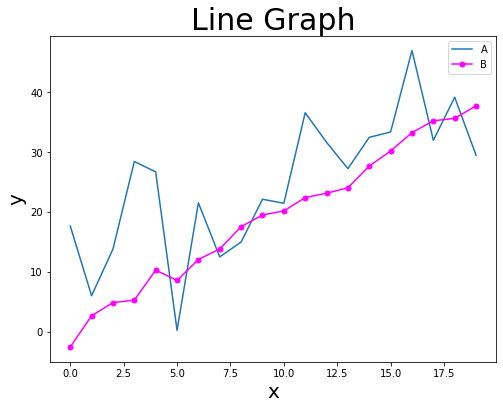

In [68]:
np.random.seed(0)
x = np.arange(20)
y1 = np.arange(20)*2 + np.random.randn(20)*10
# y1 = np.arange(20)*2 
y2 = np.arange(20)*2 + np.random.randn(20)
plt.figure(figsize=(8,6))
plt.plot(x,y1)
plt.plot(x,y2,color='magenta',marker='o', markersize=5)
plt.xlabel('x',size=20)
plt.ylabel('y',size=20)
plt.title('Line Graph',size=30)
plt.legend(['A','B'])

In [ ]:
# Q. 두개의 데이터 셋을 생성한 후 Line Graph를 작성하세요.

<function matplotlib.pyplot.show(*args, **kw)>

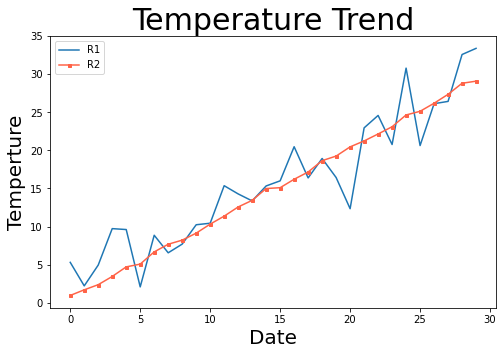

In [36]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

x= np.arange(30)
y1= np.arange(30)+np.random.randn(30)*3
y2= np.arange(30)+np.random.rand(30)
plt.figure(figsize=(8,5))
plt.plot(x,y1)
plt.plot(x,y2, color='tomato',marker='s',markersize=3)

plt.title("Temperature Trend",size=30)
plt.xlabel('Date',size=20)
plt.ylabel('Temperture',size=20)
plt.legend(['R1','R2'])
plt.show

range(0, 10)
[9 5 4 3 4 8 5 8 5 5]


Text(0.5, 0, 'x')

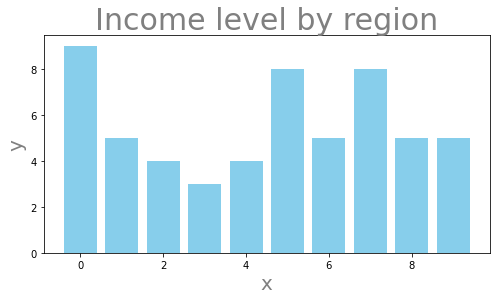

In [39]:
# 막대 그래프 : 지역별 소득수준
y = np.random.randint(2,10,size=10)
x = range(len(y))
print(x)
print(y)
plt.figure(figsize=(8,4))
plt.bar(x,y,width=0.8,color='skyblue')
plt.title('Income level by region',size=30,color='gray')
plt.ylabel('y',size=20,color='gray')
plt.xlabel('x',size=20,color='gray')

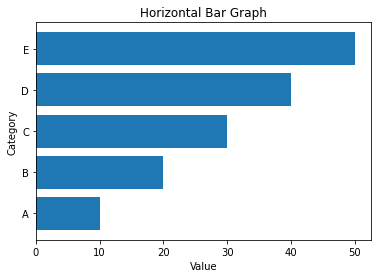

In [40]:
import matplotlib.pyplot as plt

# 데이터 생성
x = [10, 20, 30, 40, 50]
y = ['A', 'B', 'C', 'D', 'E']

# 수평 막대 그래프(barh) 그리기
plt.barh(y, x)

# x축 레이블, y축 레이블, 그래프 제목 추가
plt.xlabel('Value')
plt.ylabel('Category')
plt.title('Horizontal Bar Graph')

# 그래프 보여주기
plt.show()


<BarContainer object of 5 artists>

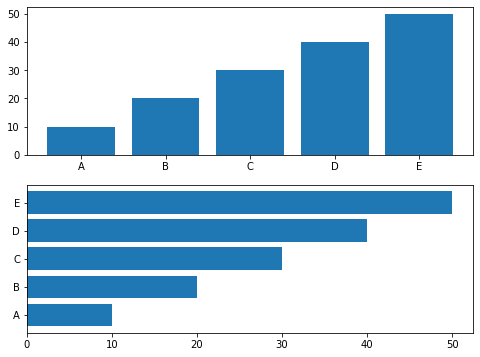

In [41]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.bar(y,x)
ax2.barh(y,x)

In [ ]:
# Q. 막대그래프가 적합한 case를 생성한 후 수평, 수직 막대그래프룰 같이 표현하는 시각화를 수행하세요.

<BarContainer object of 9 artists>

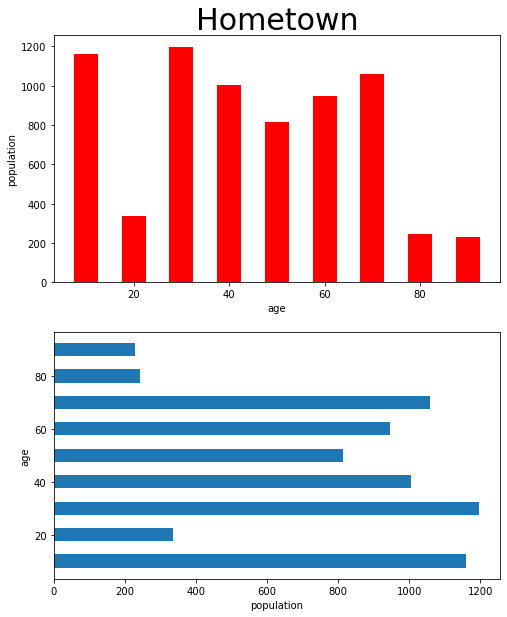

In [51]:
np.random.seed(1)
x = np.arange(10,100,10)
y = np.random.randint(100,1500,9)

fig = plt.figure(figsize=(8,10))

ax1 = fig.add_subplot(2,1,1)
plt.title("Hometown",size=30)
plt.xlabel("age",size=10)
plt.ylabel("population",size=10)
ax2 = fig.add_subplot(2,1,2)
plt.ylabel("age",size=10)
plt.xlabel("population",size=10)

ax1.bar(x,y,color="red",width=5)
ax2.barh(x,y,height=5)

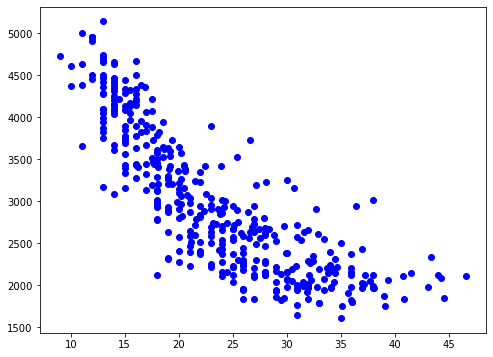

In [52]:
# scatter plot
df_auto = pd.read_excel('../dataset/auto-mpg.xlsx')
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize=(8,6))
plt.scatter(x,y,color='blue')

(array([ 3., 10., 40., 38., 36., 37., 30., 31., 21., 33., 24., 24., 20.,
        18., 13.,  9.,  4.,  1.,  5.,  1.]),
 array([ 9.  , 10.88, 12.76, 14.64, 16.52, 18.4 , 20.28, 22.16, 24.04,
        25.92, 27.8 , 29.68, 31.56, 33.44, 35.32, 37.2 , 39.08, 40.96,
        42.84, 44.72, 46.6 ]),
 <a list of 20 Patch objects>)

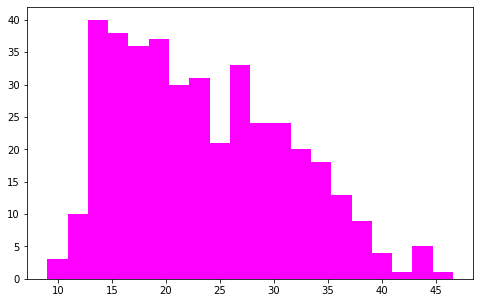

In [58]:
# histogram
plt.figure(figsize=(8,5))
plt.hist(df_auto.mpg,bins=20,color='magenta')

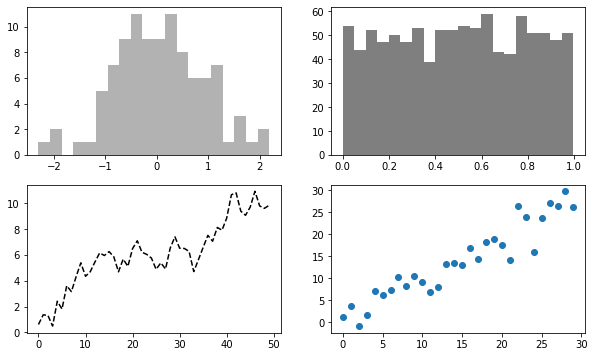

In [59]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.hist(np.random.rand(1000), bins=20, color='k', alpha=0.5)
ax3.plot(np.random.randn(50).cumsum(),'k--')
# ax3.plot(x,y,'k--')
ax4.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30))

#### 과제1. 
각 그래프로 표현할 수 있는 적합한 4개의 데이터셋을 생성하여 히스토그램, 막대그래프, 선그래프, 산점도로 2행 2열로 각각 표현하세요.

[1 4 2 1 3 4 3 4 1 4 3 2 4 4 2 4 4 4 3 1 1 1 2 4 4 3 1 3 4 4 4 3 3 2 3 1 4
 4 2 1 1 3 3 4 4 2 4 3 1 1 3 1 3 1 3 4 4 2 4 4 3 1 3 2 3 4 2 2 1 4 2 3 1 3
 2 2 2 2 3 1 3 3 4 1 4 1 3 3 1 1 3 3 1 3 1 2 3 2 3 3]


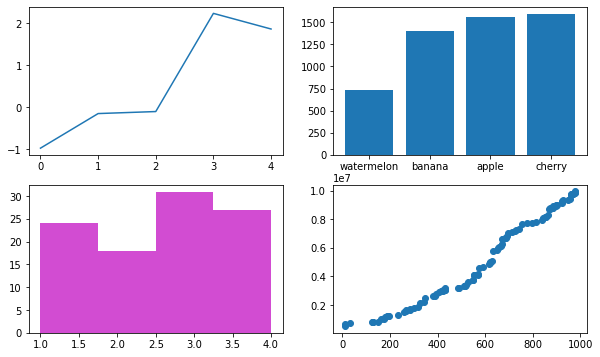

In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

np.random.seed(0)
x1 = np.random.randn(10)
x1.sort()
x1[x1>0] = x1[x1>0][::-1]
x1 = x1[:5]
#print(plt.plot(x1)) #3분기에 매출이 감소 

x2 = ["watermelon","banana","apple","cherry"]
np.random.seed(1)
y2 = np.random.randint(500,2000,4)
y2.sort() 
#plt.bar(x2,y2) #3 -> 4분기 시점에 수박의 매출 감소

np.random.seed(2)
# x3 = [1]*np.random.randint(30,40)+[2]*np.random.randint(50,60)+[3]*np.random.randint(10,20)+[4]*np.random.randint(5,10)
#plt.hist(x3)
x3 = np.random.randint(1,5,100)
print(x3)
np.random.seed(3)
x4 = np.random.randint(10,1000,100)
y4 = np.random.randint(500000,10000000,100)
x4.sort()
y4.sort()
#plt.scatter(x4,y4)

fig = plt.figure(figsize=(10,6))
ex1 = fig.add_subplot(2,2,1)
ex2 = fig.add_subplot(2,2,2)
ex3 = fig.add_subplot(2,2,3)
ex4 = fig.add_subplot(2,2,4)

# fig = plt.subplots(2,2)[1]
# ex1 = fig[0,0]
# ex2 = fig[0,1]
# ex3 = fig[1,0]
# ex4 = fig[1,1]
ex1.plot(x1)
ex2.bar(x2,y2)
ex3.hist(x3,bins=4,color = 'm', alpha = 0.7)
ex4.scatter(x4,y4)

<BarContainer object of 10 artists>

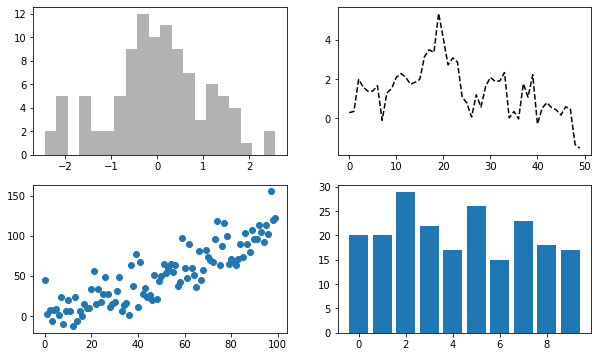

In [60]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.hist(np.random.randn(100), bins = 20, color = 'k', alpha = 0.3)
ax2.plot(np.random.randn(50).cumsum(),'k--')
ax3.scatter(x = np.arange(100), y = np.arange(100) + np.random.randn(100)*20)
ax4.bar(np.arange(10),np.random.randint(15,30, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E8241CC310>,
      dtype=object)

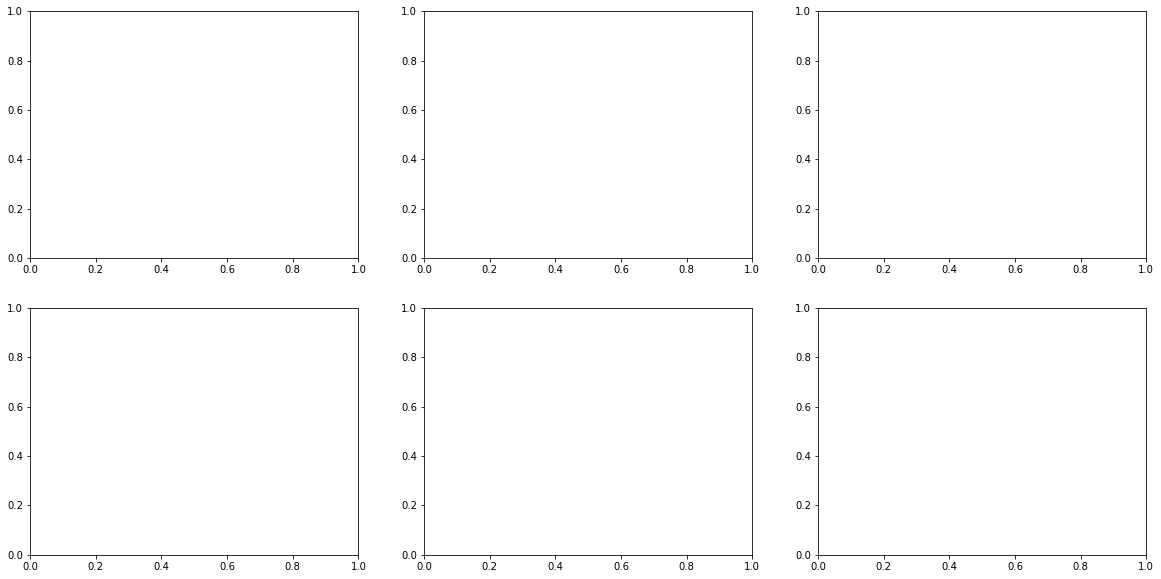

In [62]:
fig,axes = plt.subplots(2,3,figsize=(20,10))
axes

(array([2.00000e+00, 5.00000e+00, 2.30000e+01, 4.00000e+01, 9.80000e+01,
        2.43000e+02, 6.45000e+02, 1.41600e+03, 2.96900e+03, 6.08100e+03,
        1.19020e+04, 2.14660e+04, 3.78490e+04, 6.37500e+04, 1.01717e+05,
        1.54457e+05, 2.25616e+05, 3.13230e+05, 4.16141e+05, 5.27325e+05,
        6.37405e+05, 7.35609e+05, 8.12065e+05, 8.53636e+05, 8.57338e+05,
        8.21907e+05, 7.52525e+05, 6.54944e+05, 5.47124e+05, 4.35223e+05,
        3.30097e+05, 2.39433e+05, 1.66749e+05, 1.09792e+05, 6.98430e+04,
        4.12230e+04, 2.38040e+04, 1.31930e+04, 6.86100e+03, 3.38200e+03,
        1.56700e+03, 7.82000e+02, 3.11000e+02, 1.20000e+02, 6.20000e+01,
        2.10000e+01, 7.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-5.20587565, -4.98975263, -4.77362961, -4.55750659, -4.34138357,
        -4.12526055, -3.90913753, -3.69301451, -3.47689149, -3.26076847,
        -3.04464546, -2.82852244, -2.61239942, -2.3962764 , -2.18015338,
        -1.96403036, -1.74790734, -1.53178432, -1

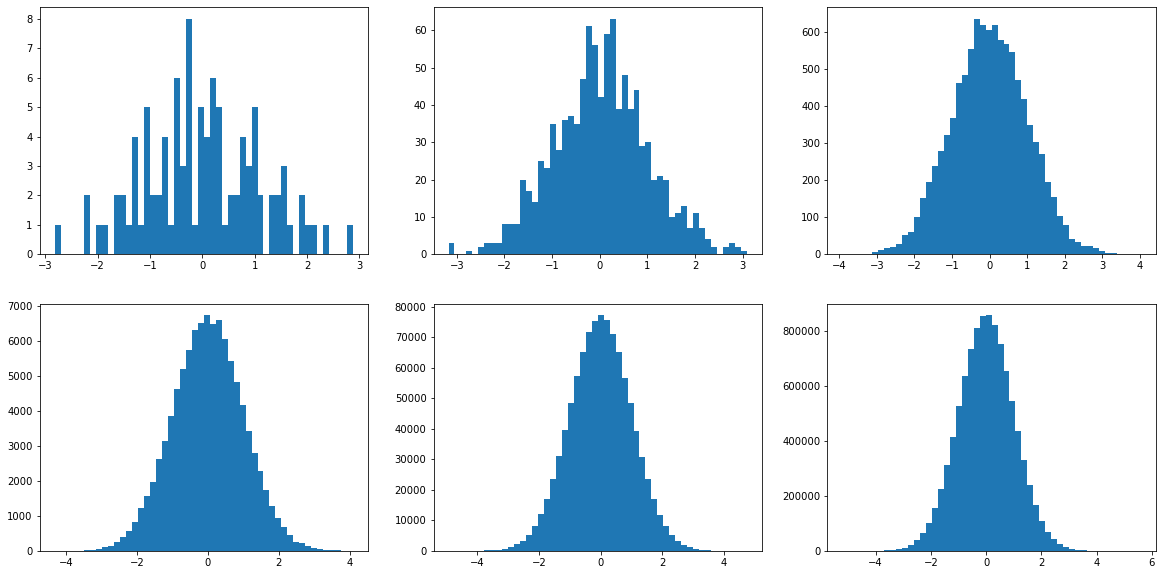

In [75]:
# 샘플 수의 변화에 따른 분포 모습
fig,axes = plt.subplots(2,3,figsize=(20,10))
axes[0,0].hist(np.random.randn(100),bins=50)
axes[0,1].hist(np.random.randn(1000),bins=50)
axes[0,2].hist(np.random.randn(10000),bins=50)
axes[1,0].hist(np.random.randn(100000),bins=50)
axes[1,1].hist(np.random.randn(1000000),bins=50)
axes[1,2].hist(np.random.randn(10000000),bins=50)

In [ ]:
import numpy as np
np.random.randn

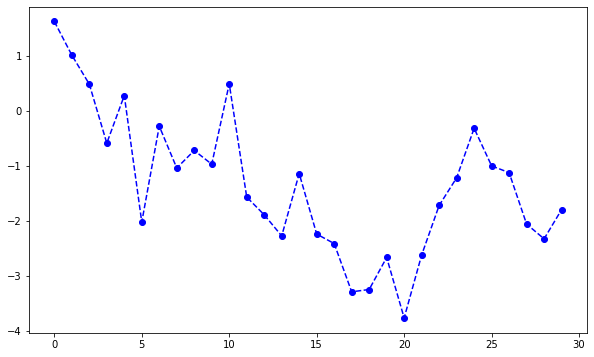

In [63]:
# 색상, 마커, 선 스타일
from numpy.random import randn
np.random.seed(1)
plt.figure(figsize=(10,6))
plt.plot(randn(30).cumsum(),linestyle='dashed', color='b', marker='o')

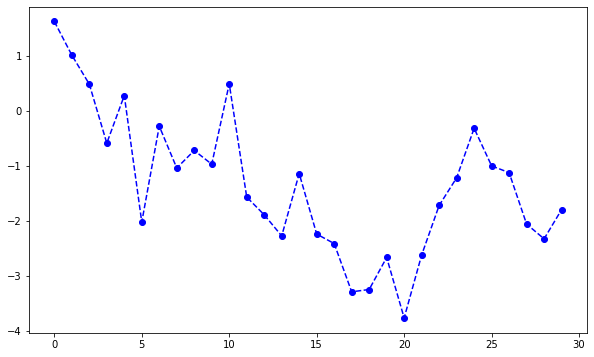

In [3]:
# plt.style.available
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(randn(30).cumsum(),linestyle='dashed', color='b', marker='o')

In [4]:
np.random.seed(0)
data = np.random.randn(1000)
cdata = data.cumsum()
print(data[:10])
cdata[:10]

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ]


array([1.76405235, 2.16420955, 3.14294754, 5.38384074, 7.25139873,
       6.27412085, 7.22420927, 7.07285206, 6.96963321, 7.38023171])

Text(0, 0.5, 'Sum')

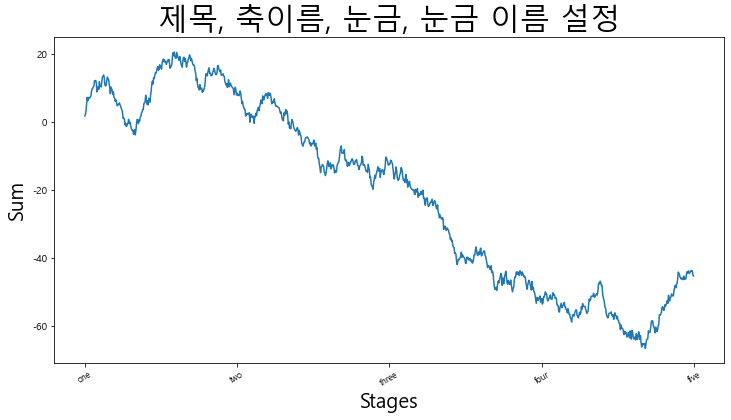

In [6]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',family='Malgun Gothic')  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(cdata)
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                           rotation=30,fontsize='small')
ax.set_title('제목, 축이름, 눈금, 눈금 이름 설정',size=30)
ax.set_xlabel('Stages',size=20)
ax.set_ylabel('Sum',size=20)

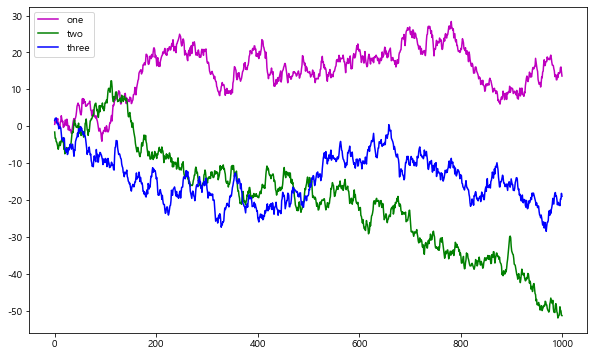

In [79]:
# 범례 추가
from numpy.random import randn
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'m', label='one')
ax.plot(randn(1000).cumsum(),'g', label='two')
ax.plot(randn(1000).cumsum(),'b', label='three')
plt.legend(loc='best')

In [14]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
def get_age_cat(age):
    cat = ''
    if age < 15: cat = 'young'
    elif age < 30: cat = 'teen'
    elif age < 45: cat = 'adult'
    elif age < 60: cat = 'mature'
    else: cat = 'elder'
    return cat
df['age_cat'] = df['age'].apply(lambda x : get_age_cat(x))
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,teen
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,teen
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult


In [16]:
df['Ratio'] = 1
df_age_cat = df.groupby('age_cat').sum()
df_age_cat

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,Ratio
age_cat,,,,,,,,,
adult,91,457,7667.00,76,83,8532.2664,137.0,130.0,215
elder,59,500,1692.50,106,40,5052.2330,146.0,152.0,203
mature,36,146,4483.50,30,27,3893.7461,57.0,53.0,89
teen,111,749,6908.50,112,87,8742.7579,197.0,198.0,306
young,45,205,453.67,142,103,2472.9459,0.0,4.0,78


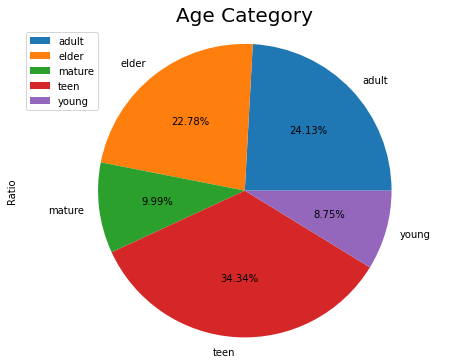

In [20]:
df['Ratio'] = 1
df_age_cat = df.groupby('age_cat').sum()
df_age_cat.Ratio.plot(kind='pie',
                     figsize=(8,6),
                     autopct='%.2f%%',
                     startangle=0)
plt.title('Age Category', size=20)
plt.axis('equal') # 가로와 세로의 비율을 동일하게 설정
plt.legend(labels=df_age_cat.index,loc='best')

#### 과제2.
fare를 5개로 범주화하여 fare_cat 컬럼을 생성하고 파이차트로 시각화 하세요.

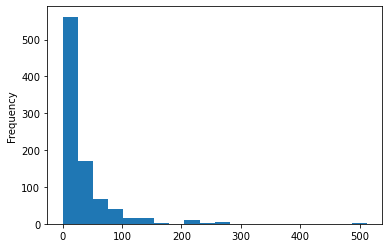

In [24]:
df.fare.plot(kind='hist',bins=20)

In [22]:
df.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

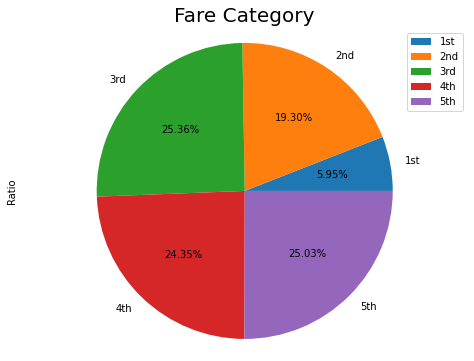

In [25]:
import seaborn as sns
df = sns.load_dataset('titanic')

def fare_cat(fare):
    cat=''
    if fare < 7.91 : cat = '5th'
    elif fare < 14.45 : cat = '4th'
    elif fare < 31 : cat = '3rd'
    elif fare < 100 : cat = '2nd'
    else : cat= '1st'
    return cat

df['fare_cat'] = df['fare'].apply(lambda x: fare_cat(x))

df['Ratio'] = 1

df_fare_cat=df.groupby('fare_cat').sum()
df_fare_cat.Ratio.plot(kind='pie',
                     figsize=(8,6),
                     autopct='%.2f%%',
                     startangle=0)
plt.title('Fare Category', size=20)
plt.axis('equal')
plt.legend(labels=df_fare_cat.index, loc='best')

#### 과제3.
Fifa 데이터셋에서 'International Reputation' 컬럼을 파이차트로 시각화하세요.

In [31]:
import pandas as pd
data = pd.read_csv('../dataset/data.csv',index_col=0)
data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [30]:
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

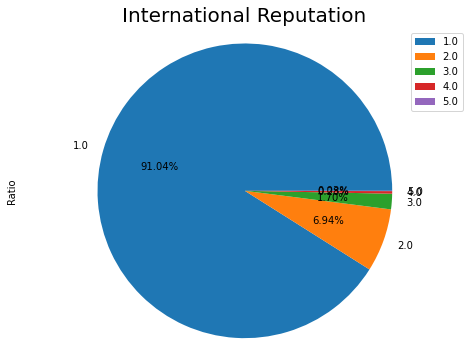

In [32]:
data['Ratio'] = 1
df_lr = data.groupby('International Reputation').sum()
df_lr.Ratio.plot(kind='pie',
                     figsize=(8,6),
                     autopct='%.2f%%',
                     startangle=0)
plt.title('International Reputation', size=20)
plt.axis('equal') # 가로와 세로의 비율을 동일하게 설정
plt.legend(labels=df_lr.index,loc='best')

In [14]:
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [15]:
data['International Reputation'].value_counts()

1.0    16532
2.0     1261
3.0      309
4.0       51
5.0        6
Name: International Reputation, dtype: int64

Text(0.5, 1.0, 'Species별 length 분포 - 수평 박스')

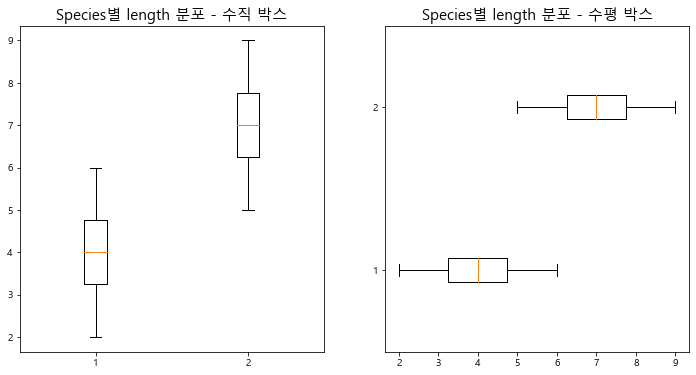

In [25]:
# 물고기 길이 데이터
df = pd.read_csv('../dataset/4_fm2.csv')
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.boxplot(x=[df[df['species']=='A']['length'],
           df[df['species']=='B']['length']])
ax2.boxplot(x=[df[df['species']=='A']['length'],
           df[df['species']=='B']['length']],vert=False)
ax1.set_title('Species별 length 분포 - 수직 박스',size=15)
ax2.set_title('Species별 length 분포 - 수평 박스',size=15)

#### 과제4. 
Fifa 데이터셋의 Wage 컬럼을 전처리해서 시각화하고 데이터가 가지고 있는 의미를 설명하세요.

In [27]:
data.Wage.value_counts()

€1K      4900
€2K      2827
€3K      1857
€4K      1255
€5K       869
         ... 
€565K       1
€93K        1
€380K       1
€225K       1
€405K       1
Name: Wage, Length: 144, dtype: int64

In [34]:
import re
def get_num(x):
    result = int(re.sub('[^0-9]','',x))
    return result
data['Nwage'] = data.Wage.apply(lambda x:get_num(x))
data[['Wage','Nwage']].head()

,Wage,Nwage
0,€565K,565
1,€405K,405
2,€290K,290
3,€260K,260
4,€355K,355


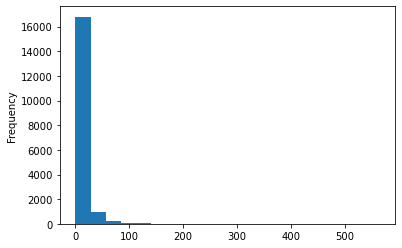

In [36]:
data.Nwage.plot(kind='hist',bins=20)

In [37]:
data.Nwage.describe()

count    18207.000000
mean         9.731312
std         21.999290
min          0.000000
25%          1.000000
50%          3.000000
75%          9.000000
max        565.000000
Name: Nwage, dtype: float64

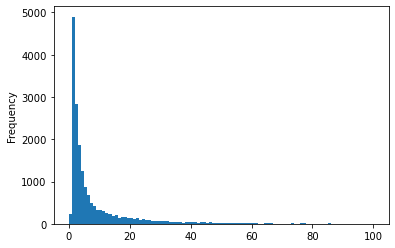

In [38]:
data.Nwage[data.Nwage <= 100].plot(kind='hist',bins=100)

In [39]:
data.Nwage[data.Nwage <= 100].describe()

count    18022.000000
mean         8.090556
std         12.874957
min          0.000000
25%          1.000000
50%          3.000000
75%          8.000000
max        100.000000
Name: Nwage, dtype: float64

In [41]:
# 로그변환 : np.log1p(x)

import numpy as np
def lognum(x):
    result = np.log1p(x)
    return result

data['Lwage'] = data.Nwage.apply(lambda x:lognum(x))
data[['Nwage','Lwage']].head()

,Nwage,Lwage
0,565,6.338594
1,405,6.006353
2,290,5.673323
3,260,5.564520
4,355,5.874931


In [43]:
data.Lwage.describe()

count    18207.000000
mean         1.678575
std          1.019503
min          0.000000
25%          0.693147
50%          1.386294
75%          2.302585
max          6.338594
Name: Lwage, dtype: float64

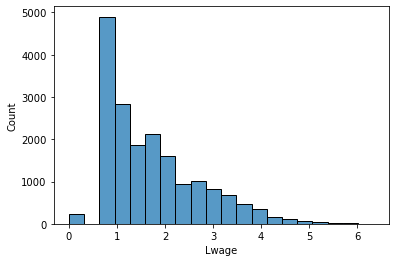

In [42]:
import seaborn as sns
sns.histplot(data.Lwage, bins=20)

#### seaborn
- 파이썬의 시각화 라이브러리 중 하나로, matplotlib 라이브러리를 기반으로 하여 좀 더 다양한 시각화 기능과 스타일을 제공 

- seaborn의 특징
    - matplotlib에 비해 더 간결하고 직관적인 API를 제공
    - matplotlib의 스타일을 기본적으로 사용하지만, 좀 더 다양한 스타일을 제공
    - 통계 분석에 사용되는 다양한 그래프를 제공
    - pandas와 연동하여 데이터 시각화를 더욱 편리하게 수행
- seaborn에서 제공하는 그래프
    - relplot: 두 변수 간의 관계를 시각화하는 그래프
    - scatterplot: 산점도 그래프
    - lineplot: 선 그래프
    - histplot: 히스토그램 그래프
    - kdeplot: 밀도 그래프
    - boxplot: 박스 그래프
    - violinplot: 바이올린 그래프
    - heatmap: 히트맵 그래프

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


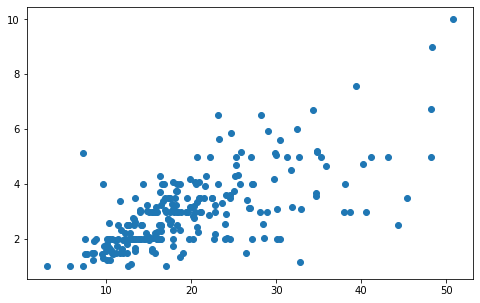

In [46]:
x=tips.total_bill
y=tips.tip

plt.figure(figsize=(8,5))
plt.scatter(x,y)

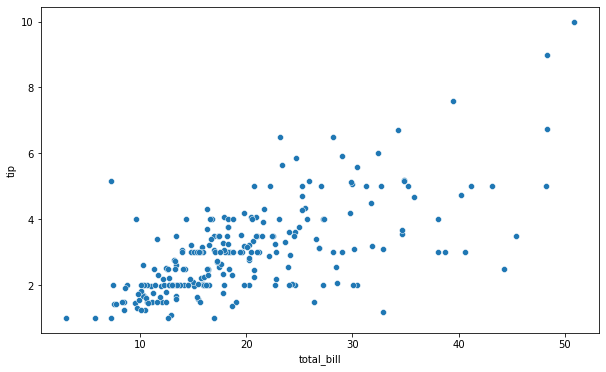

In [48]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=x,y=y,data=tips)

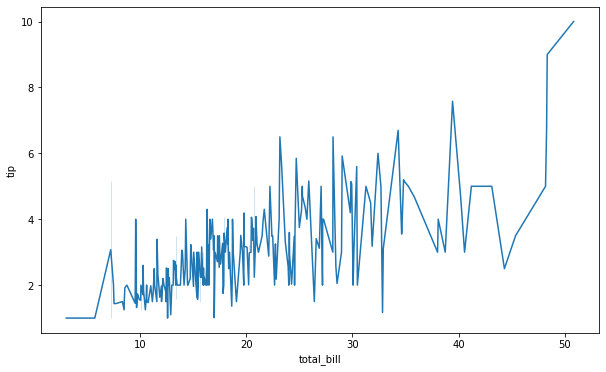

In [51]:
x=tips.total_bill
y=tips.tip
plt.figure(figsize=(10,6))
sns.lineplot(x=x,y=y)

lineplot 함수는 여러 가지 옵션을 제공하며, 이를 사용하여 선 그래프를 더욱 자세하게 설정할 수 있습니다. 
- hue 옵션을 사용하여 'sex' 열의 값에 따라 선 그래프의 색상을 다르게 설정하고, 
- style 옵션을 사용하여 'smoker' 열의 값에 따라 선 그래프의 스타일을 다르게 설정
- markers 옵션을 사용하여 데이터 포인트를 원형 모양으로 표시

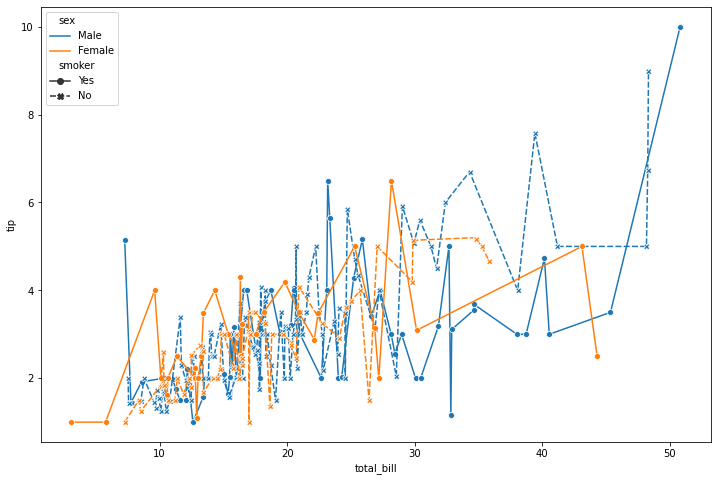

In [56]:
plt.figure(figsize=(12,8))
sns.lineplot(x='total_bill',y='tip',hue='sex',style='smoker',markers=True, data=tips)
# sns.lineplot(x='total_bill',y='tip',style='smoker',markers=True,  data=tips)

barplot : 범주형 변수에 대한 막대 그래프
- x축에는 "day" 열의 값, y축에는 "total_bill" 열의 값이 사용됨
- barplot 함수는 기본적으로 각 범주별로 y축 값의 평균과 오차 막대를 그리며, 
- ci 옵션을 사용하여 오차 막대의 크기를 조절

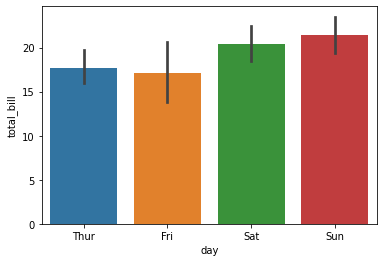

In [57]:
sns.barplot(x='day',y='total_bill',data=tips)

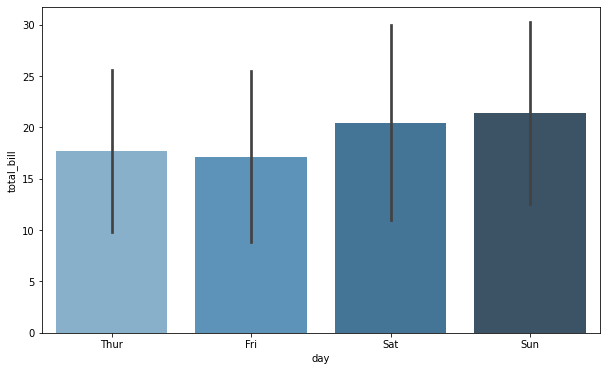

In [62]:
# ci 옶션에 'sd' 값을 사용. 이는 오차 막대의 크기를 y축 값의 표준편차로 설정
# palette 옵션을 사용하여 막대 그래프의 색상을 변경
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,6))
sns.barplot(x='day',y='total_bill',ci='sd', palette='Blues_d', data=tips)

In [ ]:
# q. 팁의 비중(tip_pct)을 구해서 요일별 팁의 비중을 보여주는 시각화를 수행하세요. 

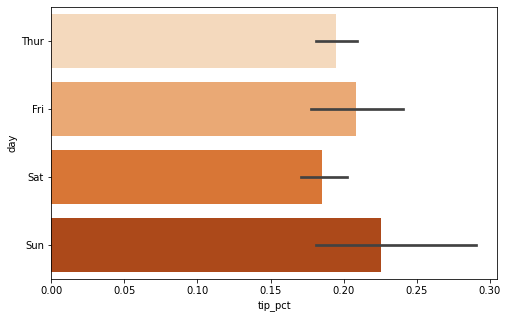

In [64]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip']) # 마크업 기준

plt.figure(figsize=(8,5))
sns.barplot(x='tip_pct',y='day',palette='Oranges',data=tips, orient='h')

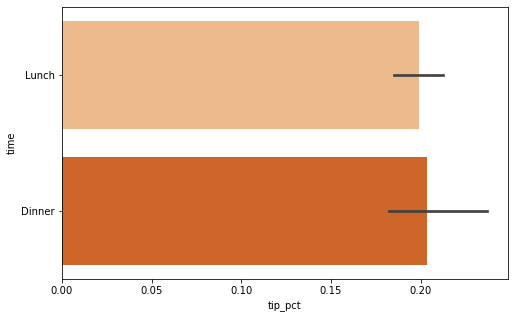

In [65]:
plt.figure(figsize=(8,5))
sns.barplot(x='tip_pct',y='time',palette='Oranges',data=tips, orient='h')

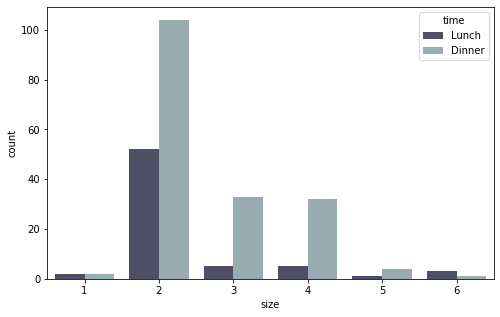

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset('tips')
plt.figure(figsize=(8,5))
sns.countplot(x='size', hue='time', data=tips, palette='bone')